# 只用Kmeans算法进行图像压缩

In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [2]:
image = io.imread('./data/image/jpg/timg.jpg')
io.imshow(image)
io.show()

# 查看图像的行和列的像素点
rows = image.shape[0]
cols = image.shape[1]


# image.shape[0]*image.shape[1]： 行乘列代表样本，再乘C值：通道，rgb
image = image.reshape(rows*cols,3)
kmeans = KMeans(n_clusters=128,n_init = 10,max_iter = 200)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_,dtype = np.uint8)
labels = np.asarray(kmeans.labels_,dtype = np.uint8)
labels = labels.reshape(rows,cols)

print(clusters.shape)
np.save('./data/image/jpg/codebook_test.npy',clusters)
# 保存压缩的图像
io.imsave('./data/image/jpg/compressed_test.jpg',labels)

<Figure size 640x480 with 1 Axes>

(128, 3)


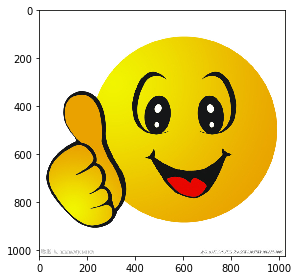

In [4]:
image = io.imread('./data/image/jpg/timg.jpg')
io.imshow(image)
io.show()

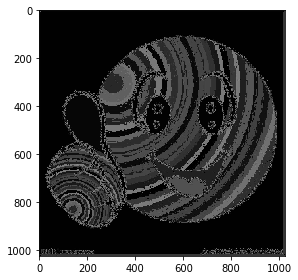

In [5]:
image = io.imread("./data/image/jpg/compressed_test.jpg")
io.imshow(image)
io.show()

# 压缩过之后就有117kb

# Kmeans算法常用操作
# 聚类算法实践
- Kmeans与Dbscan算法
- 半监督问题
- 聚类算法评估方法

In [2]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# Kmeans

In [3]:
# 导入绘制椭圆的。类别的区域的工具包
from sklearn.datasets import make_blobs

In [5]:
# 指定5个核心的中心点
blob_centers = np.array(
    [[0.2,2.3],[-1.5,2.3],[-2.8,1.8],[-2.8,2.8],[-2.8,1.3]])

#定义5个发散程度，设置较小一点，聚类起来不是那么大
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [6]:
# 画出来5个簇，n_samples： 样例2000个
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                 cluster_std=blob_std,random_state=7)

In [5]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [8]:
# 聚类出来的各自的类别，不用Y，因为是无监督的任务
y

array([4, 2, 0, ..., 3, 0, 2])

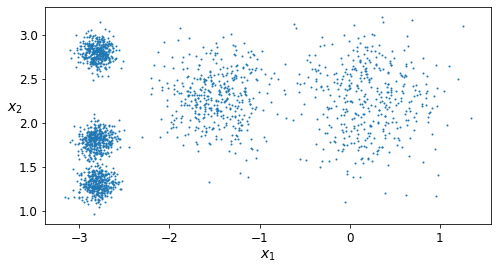

In [6]:
def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c = y,s = 1)
    plt.xlabel('$x_1$',fontsize = 14)
    plt.ylabel('$x_2$',fontsize = 14,rotation = 0)

plt.figure(figsize=(8,4))
plot_clusters(X)


# 决策边界

In [7]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k,random_state=42)
# fit_predict（）预测结果
y_pred = kmeans.fit_predict(X)

kmeans.labels_与y_pred相等

In [11]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [12]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [13]:
# 调用kmeans的中心点
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

# 实际测试

In [8]:
X_new = np.array([[1,2],[-1,2],[-1,-3],[4,-1.5]])
# predict（）方法预测数据的类别
kmeans.predict(X_new)

array([1, 3, 4, 1])

In [9]:
# transform() 方法调用得到各个点与中心点的距离
kmeans.transform(X_new)

array([[3.80908853, 0.83147037, 3.87561396, 2.48330311, 3.86415653],
       [1.81481976, 1.23547368, 1.96182856, 0.54736701, 1.93137258],
       [5.12887616, 5.39272926, 6.06736166, 5.30642492, 4.66245178],
       [7.56245941, 5.33641811, 8.03757901, 6.64970257, 7.35457299]])

In [10]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize=2)
 

In [17]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [11]:
def plot_centroids(centroids,weights=None,circle_color='w',cross_color = 'k'):
        if weights is not None:
            centroids = centroids[weights > weights.max() / 10]

            # 指定当前的中心点的位置 和符号
        plt.scatter(centroids[:,0],centroids[:,1],
                       marker='o',s=30,linewidths=8,
                       color=circle_color,zorder=10,alpha=0.9)
        plt.scatter(centroids[:,0],centroids[:,1],
                       marker='x',s=50,linewidths=50,
                       color=circle_color,zorder=11,alpha=1)


In [12]:
# 画决策边界
def plot_decision_boundaries(clusterer,X,resolution=100,
                             show_centroids = True,
                             show_xlabels=True,
                             show_ylabels=True):

    mins = X.min(axis = 0)-0.1
    maxs = X.max(axis = 0)+0.1
    xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                       np.linspace(mins[1],maxs[1],resolution))
    z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    
    # 绘制等高线，填充颜色contourf（）
    plt.contourf(z,extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap='Pastel2')
    # 绘制等高线，不填充等高线的颜色：contour（）
    plt.contour(z,extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1,colors='k')
    
                
    # 是否画数据            
    plot_data(X)
                
    # 是否展示中心点
    if show_centroids:
                plot_centroids(clusterer.cluster_centers_)
    # 判断是否展示坐标轴             
    if show_xlabels:
                 plt.ylabel('$x_1$',fontsize=14)
    else:
                 plt.tick_params(labelbottom='off')
    if show_ylabels:
                 plt.ylabel('$x_2$',fontsize=14,rotation=0)
    else:
                 plt.tick_params(labelleft='off')

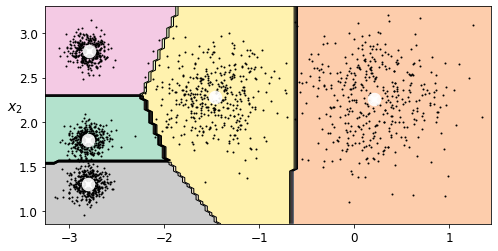

In [13]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
plt.show()

# 改变最大迭代次数

# 算法流程
# 1. 指定几个分类器，采用不同的n_init和n_clusters，max_state来建立模型
# 2.实例化分类器
# 3.将分类器用数据进行训练采用fit() 函数
# 4.进行画图
# #（1）指定画布的大小
# #（2）调用绘制数据的函数plot_data（）
# #（3）调用绘制中心点的函数plot_centroids（）
# #  (4) 设置xlabel(),ylabel(),title()
# #  (5) 在另一个子图中绘制一下决策边界plot_centroids（）

In [14]:
# n_clusters: 指定中心点簇个数，init：初始位置，随机的进行初始位置的选择
# n_init： default=10,针对不同的中心值执行多少次，n_init=1，中心点只改变一次
# max_iter：更新，进行迭代
kmeans_iter1 = KMeans(n_clusters = 5,init = 'random',n_init = 1,
                      max_iter=1, random_state = 1)
kmeans_iter2 = KMeans(n_clusters = 5,init = 'random',n_init = 1,
                      max_iter=2, random_state = 1)
kmeans_iter3 = KMeans(n_clusters = 5,init = 'random',n_init = 1,
                      max_iter=3, random_state = 1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

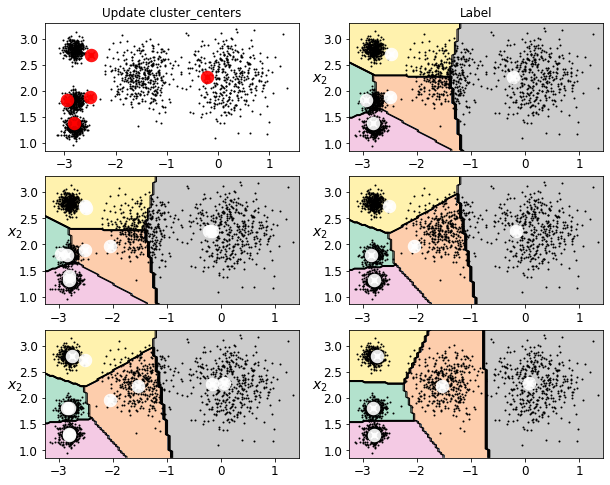

In [15]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
# weight=None,不用带权重参数
# 拿过来中心点：cluster_centers_
plot_centroids(kmeans_iter1.cluster_centers_,circle_color='r',cross_color='b')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X)
plt.title('Label')


plt.subplot(323)
# weight=None,不用带权重参数
# 拿过来中心点：cluster_centers_
plot_decision_boundaries(kmeans_iter1,X)
plot_centroids(kmeans_iter2.cluster_centers_)


plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,X)


plt.subplot(325)
# weight=None,不用带权重参数
# 拿过来中心点：cluster_centers_
plot_decision_boundaries(kmeans_iter2,X)
plot_centroids(kmeans_iter3.cluster_centers_)


plt.subplot(326)
# weight=None,不用带权重参数
# 拿过来中心点：cluster_centers_
plot_decision_boundaries(kmeans_iter3,X)

# 左边的图是三次迭代 右边的图是基于当前的左边的中心点的归属

# 不稳定的结果

# 指定不同的随机种子

In [38]:
c1 = KMeans(n_clusters=5,init='random',n_init=1,random_state=11)
c2 = KMeans(n_clusters=5,init='random',n_init=1,random_state=19)

In [39]:
def plot_clusterer_comparsion(
    
    c1,c2,X):
    c1.fit(X)
    c2.fit(X)
    
    plt.figure(figsize = (12,4))
    plt.subplot(121)
    # 画决策边界
    plot_decision_boundaries(c1,X)
    plt.subplot(122)
    plot_decision_boundaries(c2,X)

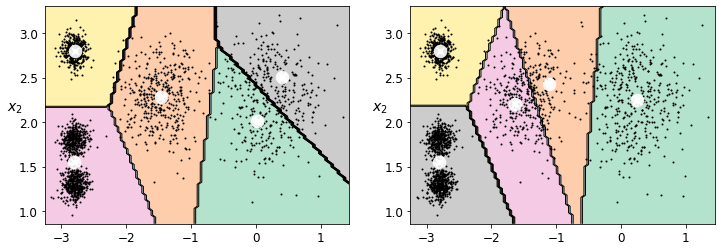

In [20]:
plot_clusterer_comparsion(c1,c2,X)

# 评估方法
#  inertia指标：每个样本与其质心的距离： 每一个样本到他的最近的中心点的距离的平方和
- 在对比的过程中，参看什么样的评估标准

# transform 得到的是当前样本到每个簇的中心距离

In [29]:
X_dist = kmeans.transform(X)
X_dist

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [30]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [32]:
# 选出当前样本点离中心点的最小距离
X_dist[np.arange(len(X_dist)),kmeans.labels_]

array([0.11146795, 0.07122059, 1.32016676, ..., 0.06769209, 0.14895409,
       0.22700281])

In [33]:
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2)

211.59853725816856

# np.sum(X_dist[np.arange(len(X_dist))
# ,kmeans.labels_]**2) 的结果与kmeans.inertia_的结果相等

In [22]:
kmeans.inertia_

211.5985372581684

In [36]:
c1.inertia_

223.2910857281904

In [37]:
c2.inertia_

237.18985388275024

In [40]:
kmeans.score(X)
# 可以看做损失

-211.59853725816856

# 找到最佳簇数      如果k值越大，得到的结果肯定会越来越小！！！！

In [42]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# 在K值等于4的时候，损失函数的降低程度发生突转，所以k值并不是越大越好，要找到一个在拐点4左右的值
# k值越大，当前的评估标准值就会越来越小

[1, 8.5, 0, 1200]

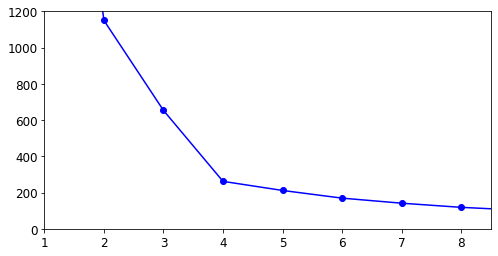

In [43]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,'bo-')
plt.axis([1,8.5,0,1200])

# 轮廓系数的作用
# S(i) =（b(i)-a(i)）/max{a(i),b(i)}
# s(i)接近1，则说明样本聚类合理
# s(i)接近-1，则说明样本应该分类到另一个簇
# s(i)近似为0，则说明样本在两个簇的边界上

In [8]:
# 导入要用的轮廓系数函数
from sklearn.metrics import silhouette_score

In [45]:
# silhouette_score() 函数传进来的是样本，样本归属
silhouette_score(X,kmeans.labels_)

0.655517642572828

In [47]:
# 利用构建的kmeans模型，用轮廓系数查看k值取多大时最合理
silhouette_score = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]

In [49]:
silhouette_score

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6070979466596362,
 0.561138795623175,
 0.5667631147874026]

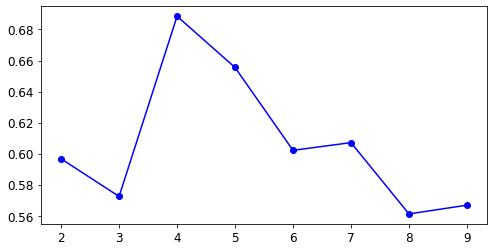

In [54]:
plt.figure(figsize=(8,4))
plt.plot(range(2,10),silhouette_score,'bo-')

# 可见k值等于4的时候还是取得较好的聚类效果

# KMeans存在的问题

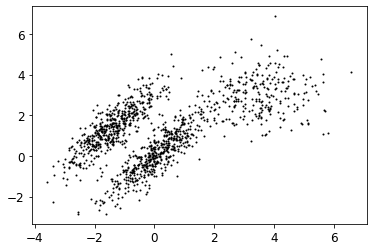

In [58]:
X1,y1 = make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples=250,centers=1,random_state=42)
X2 = X2 + [6,-6]
X = np.r_[X1,X2]
y = np.r_[y1,y2]

plot_data(X)

In [59]:
kmeans_good = KMeans(n_clusters=3,init=np.array([[-1.7,2.0],[0.5,0],[4,0]]),
                     n_init=1,random_state=42)
kmeans_bad = KMeans(n_clusters=3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Bad - inertia = 2170.893692658642')

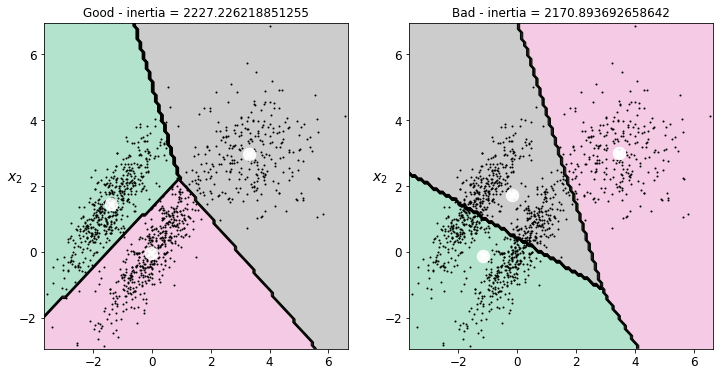

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))

# 应用实例---图像分割    聚类要求输入的数据的格式为n_sampls * n_features

In [9]:
from matplotlib.image import imread
from skimage import io

In [11]:
image = imread('./data/image/jpg/xiang2.jpg')
image.shape

# (312, 500, 3) 3：代表的rgb通道

(312, 500, 3)

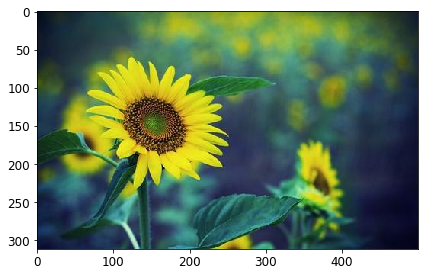

In [12]:
image = imread('./data/image/jpg/xiang2.jpg')
io.imshow(image)
io.show()


In [83]:
# import tensorflow as tf

# image = tf.placeholder(tf.float32,[127,127,3])
# image = image/255.

# 当前得到的数据为三维的，需要进行降维，分成一个个的像素点

In [13]:
# -1: 代表的就是上面的相乘  (312, 500, 3) ，再除以3
X = image.reshape(-1,3)
X.shape

# (156000, 3)，：156000个像素点，每个像素点有4个颜色通道

(156000, 3)

In [14]:
# n_clusters：图像中像素点个数只有8种不同的像素点
kmeans = KMeans(n_clusters = 8,random_state = 42).fit(X)

In [8]:
# 得到当前每个簇的中心位置 8个
kmeans.cluster_centers_

array([[ 59.16542882,  81.1755084 ,  37.62519894],
       [147.43763076, 172.625496  ,  55.87562225],
       [215.88622679, 210.57852484,  33.77910186],
       [ 82.04201553, 149.96392145, 120.85850206],
       [ 56.08506165, 102.87200323,  98.46521124],
       [ 20.44009394,  31.82825133,  48.94621545],
       [100.51859473, 133.35535742,  61.85055632],
       [ 39.05596582,  62.59547421,  79.35217323]])

In [9]:
# 通过样本的标签，找到当前的中心点，
kmeans.cluster_centers_[kmeans.labels_]

array([[20.44009394, 31.82825133, 48.94621545],
       [20.44009394, 31.82825133, 48.94621545],
       [20.44009394, 31.82825133, 48.94621545],
       ...,
       [20.44009394, 31.82825133, 48.94621545],
       [20.44009394, 31.82825133, 48.94621545],
       [20.44009394, 31.82825133, 48.94621545]])

In [16]:
# 利用reshape() 操作，还原成三维的数据
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(312, 500, 3)

In [17]:
segmented_imgs = []

# 指定想要得到多少个不同的像素点
n_colors = (10,8,6,4,2)

# 遍历么一个不同的像素点
for n_cluster in n_colors:
    # 构建一下KMeans算法
    kmeans = KMeans(n_clusters = n_cluster,random_state = 42).fit(X)
    # 拿到结果
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
plt.figure(figsize=(16,7))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

# enumerate() 函数进行枚举，得到当前的索引和簇的个数
for idx,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx]）
    plt.title('{}colors'.format(n_clusters))

SyntaxError: invalid character in identifier (<ipython-input-25-ad8593f8b2c1>, line 9)

# 半监督学习 : 首先将训练集聚类为50个集群，然后对于每一个聚类，让我们找到最靠近质心的代表图像

In [11]:
from sklearn.datasets import load_digits
X_digits,y_digits = load_digits(return_X_y = True)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_digits,y_digits,random_state=42)

In [12]:
X_digits.shape   # 像素点
# 8*8 的数据

(1797, 64)

In [13]:
x_train.shape

(1347, 64)

In [14]:
y_train.shape

(1347,)

In [15]:
from sklearn.linear_model import LogisticRegression

# 只用了50条数据，
n_labeled = 50
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train[:n_labeled],y_train[:n_labeled])
log_reg.score(x_test,y_test)

0.8266666666666667

In [16]:
k = 50
kmeans = KMeans(n_clusters=k,random_state=42)
X_digist_dist = kmeans.fit_transform(x_train)

In [17]:
X_digist_dist.shape
# 1347个数据，50个样本

(1347, 50)

# 现在让我们手动的绘制这下代表性图像，并手动标记他们

In [18]:
# 拿到50个样本取最近的
representative_digit_idx = np.argmin(X_digist_dist,axis=0)
representative_digit_idx  # 索引

array([ 911,  559,   23,  159,  736, 1056,  776,  795,  753,  598,  737,
        683, 1194,  602,  817, 1284,   73,  702,   94,  891,  805, 1071,
       1314, 1022, 1050,  525,  588,  481, 1005,  766,  848,  731,  749,
       1322, 1336,  705, 1151,  494,  357,  459,  843,  850,  151,  256,
        576,  460,  596,  648,  841,  214], dtype=int64)

In [19]:
# 把索引回传到训练集当中,找到所有的样本
x_representative_digits = x_train[representative_digit_idx]

In [20]:
x_representative_digits

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 14.,  2.,  0.],
       [ 0.,  0.,  4., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  1.,  0.],
       [ 0.,  0.,  6., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  9.,  0.,  0.]])

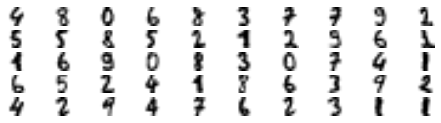

In [21]:
plt.figure(figsize=(8,2))
for index,x_representative_digit in enumerate(x_representative_digits):
    plt.subplot(k//10,10,index + 1)
    plt.imshow(x_representative_digit.reshape(8,8),cmap='binary',
               interpolation='bilinear')
    plt.axis('off')

plt.show()

In [22]:
# 重新指定标签
y_representative_digits = np.array([
    4,8,0,6,8,3,7,7,9,2,
    5,5,8,5,2,1,2,9,6,2,
    1,2,9,0,8,3,0,7,4,2,
    6,5,2,4,1,8,6,3,9,2,
    4,2,9,4,7,6,2,3,1,1])

# 现在我们有一个只有50个标记实例的数据集，他们中的每一个都是集群的代表图像，而不是完全随机的实例，看一下性能

In [23]:
log_reg = LogisticRegression(random_state=42)
# 期望得到的是二维的数组
log_reg.fit(x_representative_digits,y_representative_digits)
log_reg.score(x_test,y_test)

0.8733333333333333

# 以上我们得到了50个标签，我们可以更进一步，如果我们将标签传播到同一群集中的所有实例中，该怎么做？？？？

In [24]:
# 做空的标签
y_train_propagated = np.empty(len(x_train),dtype=np.int32)
for i in range(k):
    # 打标签
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
    
log_reg = LogisticRegression(random_state=12)
log_reg.fit(x_train,y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
log_reg.score(x_test,y_test)

0.8888888888888888

# 利用所有的样本太多了，每个簇找到前20个

In [30]:
import numpy as np

In [48]:
percentile_closest = 20

# 遍历距离的结果
X_cluster_dist = X_digist_dist[np.arange(len(x_train)),kmeans.labels_]
for i in range(k):
    
    # 找到属于当前这个簇，index
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]  # 选择当前簇的所有样本
    
    # cluster_dist: 当前样本到簇中心的距离
    cutoff_distance = np.percentile(cluster_dist,percentile_closest)  # 排序找到前20个
    # 判断当前样本是否大于排序找到的前20个的距离，大于的话，就指定为False
    above_cutoff = (X_cluster_dist > cutoff_distance)
    # 指定特殊标号
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [49]:
# 选择当前簇中的样本距离没有被标记为-1的索引
partially_propagated = (X_cluster_dist != -1)
# 将当前的索引传到数据或样本中标签中，返回满足条件的数据集标签
X_train_partially_propagated = x_train[partially_propagated]
Y_train_partially_propagated = y_train_propagated[partially_propagated]

In [50]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated,Y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log_reg.score(x_test,y_test)

0.8866666666666667

# dbscan : 最核心的影响因素就是半径啦
## 能用分类做的就不用聚类做，没有标签值，不能自圆其说

In [52]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 1000,noise = 0.05,random_state = 42)

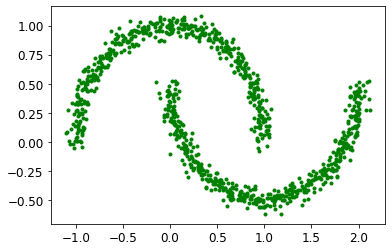

In [54]:
plt.plot(X[:,0],X[:,1],'g.')

In [96]:
from sklearn.cluster import DBSCAN

In [97]:
# 进行实例化: 参数eps： 表示半径
dbscan = DBSCAN(eps = 0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [98]:
# 调用其属性值
dbscan.labels_[:10]
# -1 ：代表离群点

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [99]:
# 调用所有核心对象的索引
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [100]:
# 自动生成多少簇，看一下,可见，一共有7个簇
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [101]:
# 
len(np.unique(dbscan.labels_))

8

In [102]:
np.unique(len(dbscan.labels_))

array([1000])

In [110]:
# 设置半径大一些
# 进行实例化: 参数eps： 表示半径
dbscan2 = DBSCAN(eps = 0.15,min_samples=5)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [115]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [111]:
def plot_dbscan(dbscan,X,size,show_xlabels=True,show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    # 核心对象
    core_mask[dbscan.core_sample_indices_] = True
    # 离群点
    anomalies_mask = dbscan.labels_ == -1
    # 普通对象点
    non_core_mask = ~(core_mask|anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:,0],cores[:,1],c=dbscan.labels_[core_mask],
                marker='o',s=size,cmap='Paired')
    plt.scatter(cores[:,0],cores[:,1],marker='*',s=20,c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:,0],anomalies[:,1],c='r',marker='x',s=100)
    plt.scatter(non_cores[:,0],non_cores[:,1],
                c=dbscan.labels_[non_core_mask],
                marker='.')
    
    if show_xlabels:
        plt.xlabel('$x_1$',fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
            
    if show_ylabels:
        plt.ylabel('$x_2$',fontsize=14,rotation=0)
    else:
        plt.tick_params(labelleft='off')
        
    plt.title('eps={:.2f},min_samples={}'.format(dbscan.eps,dbscan.min_samples),
              fontsize=14)
                
                

In [1]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_dbscan(dbscan,X,size=100)

plt.subplot(122)
plot_dbscan(dbscan2,X,size=600,show_ylabels=False)

plt.show()

NameError: name 'plt' is not defined

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


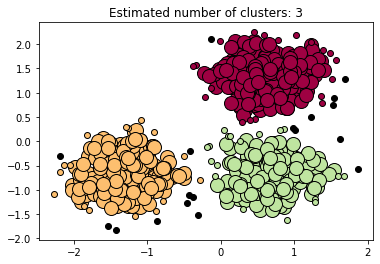

In [3]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()